# **1. Loading the packages and the input file**
Starting with Chesapeake roads.

In [1]:
"""

***********                                                    ***********
***********     Upload the file in the colab files first!!!    ***********
***********                                                    ***********

"""

!pip uninstall networkx

!pip uninstall community
!pip uninstall python-louvain
!pip install python-louvain==0.15

!pip install networkx

Found existing installation: networkx 3.2.1
Uninstalling networkx-3.2.1:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/networkx-3.2.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/networkx/*
Proceed (Y/n)? n
Found existing installation: community 1.0.0b1
Uninstalling community-1.0.0b1:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/community-1.0.0b1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/community/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.10/dist-packages/community/community_louvain.py
    /usr/local/lib/python3.10/dist-packages/community/community_status.py
Proceed (Y/n)? n
Found existing installation: python-louvain 0.16
Uninstalling python-louvain-0.16:
  Would remove:
    /usr/local/bin/community
    /usr/local/lib/python3.10/dist-packages/community/*
    /usr/local/lib/python3.10/dist-packages/python_louvain-0.16.dist-info/*
  Would not remove (might be manually added):
    /usr/local/lib/python

In [3]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import networkx as nx
import community
import random

from google.colab import files

file_name = 'road-chesapeake.mtx'
file_path = f'/content/{file_name}'
G = nx.readwrite.read_adjlist(file_path, comments="%", delimiter=' ', nodetype=int)

#Data sampling : Set a fixed seed for reproducibility
random.seed(42) # You can use any integer

# Specify the percentage of nodes to sample
sample_percentage = 1

# Calculate the number of nodes to sample
num_nodes_to_sample = int(len(G) * sample_percentage)

# Randomly select nodes to include in the sample
sampled_nodes = random.sample(list(G.nodes), num_nodes_to_sample)

# Get nodes sorted by degree
sorted_nodes_by_degree = sorted(G.degree, key=lambda x: x[1], reverse=True)

# Extract the top nodes based on degree
sampled_nodes = [node[0] for node in sorted_nodes_by_degree[:num_nodes_to_sample]]

# Create a subgraph containing only the sampled nodes and their incident edges
sampled_subgraph = G.subgraph(sampled_nodes)

# Print some information about the graph
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
print("Graph density:", nx.density(G))

# Print some information about the sample sub-graph
print("Number of nodes in sample data:", sampled_subgraph.number_of_nodes())
print("Number of edges in sample data:", sampled_subgraph.number_of_edges())
print("Graph density in sample data:", nx.density(sampled_subgraph))

Number of nodes: 40
Number of edges: 172
Graph density: 0.2205128205128205
Number of nodes in sample data: 40
Number of edges in sample data: 172
Graph density in sample data: 0.2205128205128205


# **2. Compute the metrics**

We use the following metrics for analyzing our network:

**1. Community Structure Analysis**

**2. Local Connectivity:** Including clustering coefficient and local efficiency

**3. Degree_distribution_analysis:** The purpose of this analysis is to observe if there are any power-law relations in the network.

<ipython-input-4-bfcf4d576f13>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', max(partition.values()) + 1)


Global efficiency: 0.5982905982905985
Community Structure Analysis:
Modularity: 0.2698587074094105

Local Connectivity Analysis:
Clustering Coefficient: 0.43878342274133353
Local Efficiency: 0.6412616765351482

Degree Distribution Analysis:
Average Degree: 8.6
Assortativity: -0.35275994878227834
Betweenness Centrality: 0.02233468286099865


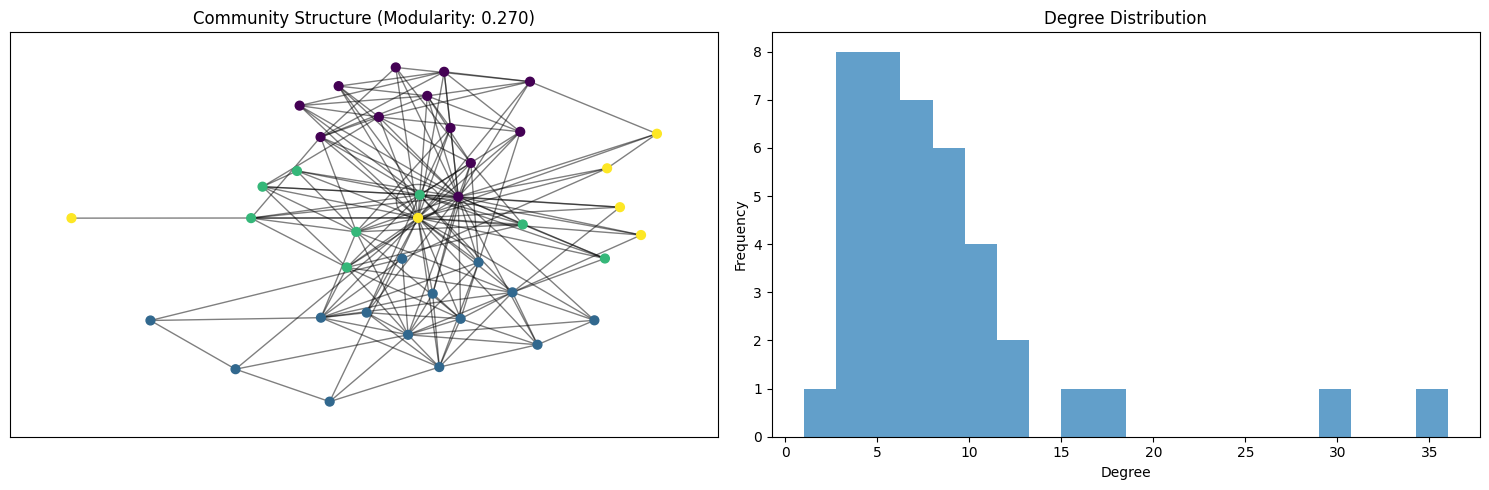

In [4]:
# Create a 1x2 grid of subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Community Structure Analysis
def community_structure_analysis(graph):
    # Apply the Louvain method for community detection
    partition = community.best_partition(graph)

    # Evaluate modularity
    modularity = community.modularity(partition, graph)

    # Visualize communities
    pos = nx.spring_layout(graph)
    # color the nodes according to their partition
    cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
    nx.draw_networkx_nodes(graph, pos, partition.keys(), node_size=40,
                           cmap=cmap, node_color=list(partition.values()), ax=axs[0])
    nx.draw_networkx_edges(graph, pos, alpha=0.5, ax=axs[0])
    axs[0].set_title("Community Structure (Modularity: {:.3f})".format(modularity))

    return modularity

# Local Connectivity
def local_connectivity_analysis(graph):
    # Clustering Coefficient
    clustering_coefficient = nx.average_clustering(graph)

    # Local Efficiency
    local_efficiency = nx.local_efficiency(graph)

    return clustering_coefficient, local_efficiency

# Degree Distribution
def degree_distribution_analysis(graph):
    # Degree Histogram
    degree_sequence = [d for n, d in graph.degree()]
    axs[1].hist(degree_sequence, bins=20, alpha=0.7)
    axs[1].set_title("Degree Distribution")
    axs[1].set_xlabel("Degree")
    axs[1].set_ylabel("Frequency")

    # Average Degree
    avg_degree = sum(dict(graph.degree()).values()) / len(graph)

    # Assortativity
    assortativity = nx.degree_assortativity_coefficient(graph)

    return avg_degree, assortativity

# Betweenness Centrality
def measure_betweeness_centrality(graph):
     betweenness_values = nx.betweenness_centrality(graph, normalized=True).values()
     average_betweenness = sum(betweenness_values) / len(betweenness_values)
     return average_betweenness

#Global Efficiency
def global_efficiency(graph):
  return nx.global_efficiency(graph)


# Interpretation
def interpretation(modularity, clustering_coefficient, local_efficiency, avg_degree, assortativity,betweenness,global_eff):
    print(f"Global efficiency: {global_eff}")
    print("Community Structure Analysis:")
    print(f"Modularity: {modularity}")
    print("\nLocal Connectivity Analysis:")
    print(f"Clustering Coefficient: {clustering_coefficient}")
    print(f"Local Efficiency: {local_efficiency}")
    print("\nDegree Distribution Analysis:")
    print(f"Average Degree: {avg_degree}")
    print(f"Assortativity: {assortativity}")
    print(f"Betweenness Centrality: {betweenness}")

# Community Structure Analysis
modularity = community_structure_analysis(sampled_subgraph)

# Local Connectivity Analysis
clustering_coefficient, local_efficiency = local_connectivity_analysis(sampled_subgraph)

# Degree Distribution Analysis
avg_degree, assortativity = degree_distribution_analysis(sampled_subgraph)

# Betweenness Centrality
betweenness = measure_betweeness_centrality(sampled_subgraph)

global_eff = global_efficiency(sampled_subgraph)

# Adjust layout for better spacing
plt.tight_layout()

# Interpretation
interpretation(modularity, clustering_coefficient, local_efficiency, avg_degree, assortativity,betweenness,global_eff)

# Show the plots
plt.show()


## **Attacks**
1. **Random Failure Attack**

<ipython-input-5-29b8f18a1f2d>:8: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  nodes_to_remove = random.sample(graph.nodes(), num_nodes_to_remove)
<ipython-input-4-bfcf4d576f13>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
/usr/local/lib/python3.10/dist-packages/networkx/algorithms/assortativity/correlation.py:302: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)


test [0.2698587074094105, 0.23893229166666666, 0.24771714515304258, 0.2085219556360344, 0.2599480968858131, 0.2777777777777778, 0.19944444444444448, 0.2142857142857143, 0.326530612244898, 0.0, 0]
test [0.43878342274133353, 0.43963549806940616, 0.501399561087061, 0.3683597834913624, 0.3257756132756132, 0.44222222222222224, 0.27676282051282053, 0.2976190476190476, 0.1875, 0.0, 0]
Global efficiency: 0.16666666666666666
Community Structure Analysis:
Modularity: 0.0

Local Connectivity Analysis:
Clustering Coefficient: 0.0
Local Efficiency: 0.0

Degree Distribution Analysis:
Average Degree: 0.5
Assortativity: nan
Betweenness Centrality: 0.0
number of Nodes after attack 0
number of Edges after attack 0


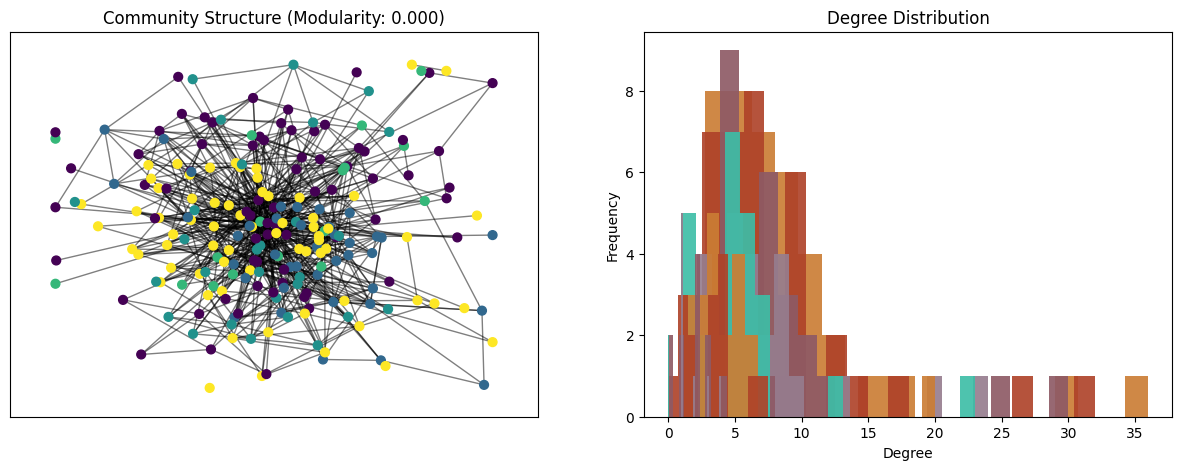

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
def simulate_random_failures(graph, failure_fraction):

    failed_graph = graph.copy()

    num_nodes_to_remove = int(failure_fraction * len(graph.nodes()))

    nodes_to_remove = random.sample(graph.nodes(), num_nodes_to_remove)

    failed_graph.remove_nodes_from(nodes_to_remove)

    return failed_graph


# Define the range of failure fractions to consider
failure_fractions = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# failure_fractions = [0.0, 0.1, 0.2, 0.3,0.4,0.5,0.6]

# Initialize lists to store metric values
modularity_values = []
clustering_coefficient_values = []
local_efficiency_values = []
avg_degree_values = []
assortativity_values = []
betweenness_values = []
global_eff_values = []
avg_shortest_path_values = []

# Analyze the graph at different failure fractions
for failure_fraction in failure_fractions:
# failure_fraction = 0.2
  failed_graph = simulate_random_failures(sampled_subgraph, failure_fraction)
  if failed_graph.number_of_nodes() > 0:
  # Community Structure Analysis
    modularity = community_structure_analysis(failed_graph)


  # Local Connectivity Analysis
    clustering_coefficient = local_connectivity_analysis(failed_graph)[0]
    local_efficiency = local_connectivity_analysis(failed_graph)[1]

  # Degree Distribution Analysis
    avg_degree = degree_distribution_analysis(failed_graph)[0]
    assortativity = degree_distribution_analysis(failed_graph)[1]

  # Betweenness Centrality
    betweenness = measure_betweeness_centrality(failed_graph)

    global_eff = global_efficiency(failed_graph)

    modularity_values.append(modularity)
    clustering_coefficient_values.append(clustering_coefficient)
    local_efficiency_values.append(local_efficiency)
    avg_degree_values.append(avg_degree)
    assortativity_values.append(assortativity)
    betweenness_values.append(betweenness)
    global_eff_values.append(global_eff)
  else:
    modularity_values.append(0)
    clustering_coefficient_values.append(0)
    local_efficiency_values.append(0)
    avg_degree_values.append(0)
    assortativity_values.append(0)
    betweenness_values.append(0)
    global_eff_values.append(0)



print("test",modularity_values)
print("test",clustering_coefficient_values)
# Adjust layout for better spacing
# plt.tight_layout()

# Interpretation
interpretation(modularity, clustering_coefficient, local_efficiency, avg_degree, assortativity,betweenness,global_eff)

print("number of Nodes after attack",failed_graph.number_of_nodes())
print("number of Edges after attack",failed_graph.number_of_edges())

# Show the plots
# plt.show()

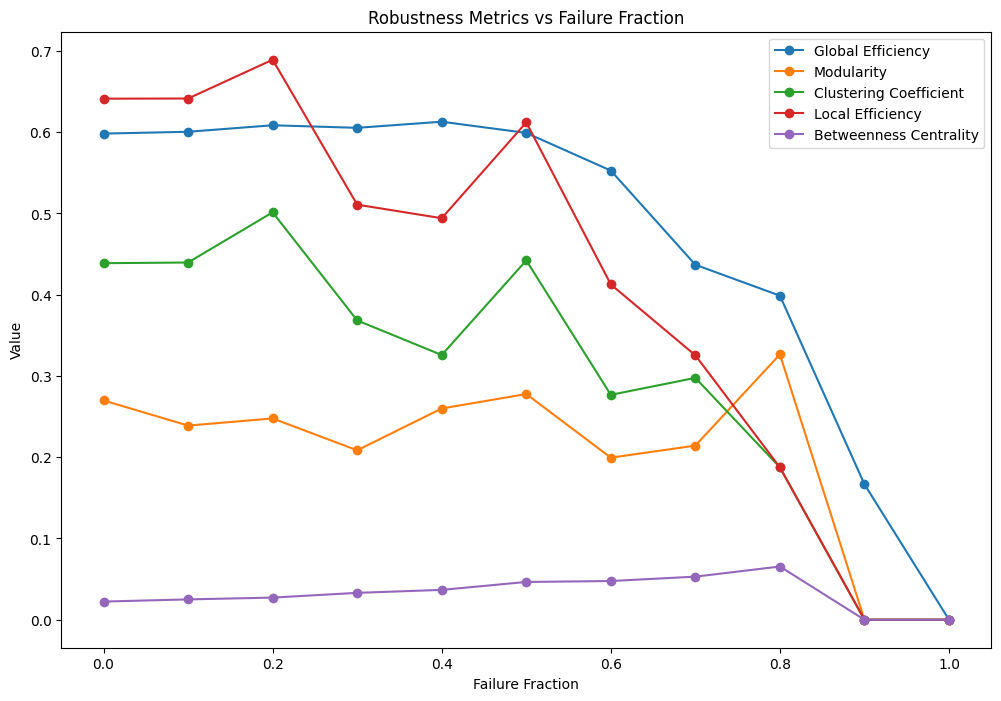

In [6]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(failure_fractions, global_eff_values, label='Global Efficiency', marker='o')
ax.plot(failure_fractions, modularity_values, label='Modularity', marker='o')
ax.plot(failure_fractions, clustering_coefficient_values, label='Clustering Coefficient', marker='o')
ax.plot(failure_fractions, local_efficiency_values, label='Local Efficiency', marker='o')
ax.plot(failure_fractions, betweenness_values, label='Betweenness Centrality', marker='o')

ax.set_xlabel('Failure Fraction')
ax.set_ylabel('Value')
ax.set_title('Robustness Metrics vs Failure Fraction')
ax.legend()

plt.show()